In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from numpy import reshape
import seaborn as sns

# Introduction to Dimensionality Reduction Methods 

### Arash Sarshar, Postdoctoral Associate at Virginia Tech
people.cs.vt.edu/sarshar


## Objectives

You will be able to: 
- Understand the concept of _Dimensionality Reduction_
- Use important dimensionality reduction techniques such as:
    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)
    -  t-SNE

- Practice performing different reduction techniques using the scikit-learn library
- Evaluate model performance with and without dimensionality reduction
- Create vizualizations to inspect the performance of dimensionality reduction methods

## We are generating massive amounts of data with greater resolution/density everyday 

<img src="./image/bigData.png" width=50% style="margin-left:auto margin-right:auto">

<figcaption><h1 style="font-size:50%;text-align: center;"> Infographic by Ben Walker, Marketing Executive at vouchercloud </h1> </figcaption>


## Our engineerign models are becoming more compelx
<img     src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Typhoon_Mawar_2005_computer_simulation.gif" width=300px style="margin-left:auto; margin-right:auto">


<figcaption><h1 style="font-size:30%;text-align: center;"> Andrey Kravtsov (the University of Chicago) and Anatoly Klypin (New Mexico State University), Heatlord at English Wikipedia, Vincent Voelz, CC BY 3.0 US, via Wikimedia Commons</h1> </figcaption>

## Applications of Dimensionality Reduction

* Extracting useful features for learning/inference
    * reduce input size to ML models 
    * reduce over-fitting 
* Video and Image Compression
* Visualizing high dimensional data (Exploratory data analysis)
* Identifying patterns in DNA Sequences and gene expression data



## The main idea

* Learn transformations from high dimensional data to a low dimensional representation  such that the projected data retain __useful properties__ 

* $ z = f(x),~~  x\in \mathbb{R}^H, z \in \mathbb{R}^L, ~~ L<< H$  


 ##  example
 <img     src="./image/proj1.png" width=800px style="margin-left:auto; margin-right:auto">


 ##  example
 <img     src="./image/proj2.png" width=800px style="margin-left:auto; margin-right:auto">


## Principal Components Analysis (PCA)

* linear and orthogonal projection 
* Projection $ z = W^Tx$
* minimize average distance  $| x - z|_2 $ over the data

<img src="./image/PCA-1D.png" width=50% style="margin-left:auto; margin-right:auto">
<figcaption><h1 style="font-size:30%;text-align: center;"> Murphy (2022) </h1> </figcaption>



In [2]:
def plot_projec_example():
    
    ax = plt.figure().add_subplot(projection='3d')

    # Plot a sin curve using the x and y axes.
    x = np.linspace(0, 1, 100)
    y = x
    ax.plot(x, y, zs=0, zdir='z',c= 'r')

    # Plot scatterplot data (20 2D points per colour) on the x and z axes.
    colors = ('r', 'g', 'b', 'k')

    # Fixing random state for reproducibility
    np.random.seed(24)


    y = x + 0.1*np.random.randn(len(x))

    ax.scatter(x, y, zs=0, zdir='z')
    ax.plot(xs=0*x,ys=x,zs = x ,c='g')

    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Customize the view angle so it's easier to see that the scatter points lie
    # on the plane y=0
    ax.view_init(elev=20., azim=-35, roll=0)

    plt.show()

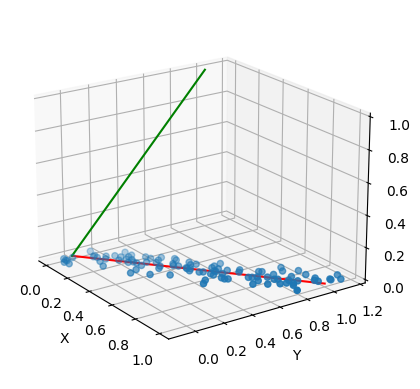

In [3]:
plot_projec_example()

 ##  Another interpretation of PCA
 <img     src="./image/proj1.png" width=800px style="margin-left:auto; margin-right:auto">


* linear and orthogonal projection 
* Projection $ z = W^Tx$
* minimize average reconstruction error $| x - z|_2 $ over the data
##* maximize the variance of the projected datapoints $\mathbb{V}[ z]$

## Simple derivation of PCA
* Assume projected direction is $\mathbf{u}_1$
* $\bar{x} = \frac{1}{N} \sum\limits_{n=1}^{N} x_n$
* $|\mathbf{u}_1|$ = 1
* $z_n = \mathbf{u}_1^T x_n$

* $|\mathbf{u}_1|$ = 1
* $z_n =  \mathbf{u}_1^T x_n$
* $ \bar z  = \frac{1}{N} \sum\limits_{n=1}^{N} z_n = \mathbf{u}_1^T \bar x $ 
* $\mathbb{V}[ z] =\mathbb{E}[(z - \bar z)^2]  = \frac{1}{N}\sum\limits_{n=1}^{N} (z_n - \bar z) (z_n - \bar z )^T =  \mathbf{u}_1^T \mathbf{S}\mathbf{u}_1 $ 
* $\mathbf{S} = \frac{1}{N}\sum\limits_{n=1}^{N} (x_n - \bar x) (x_n - \bar x )^T  $




* $\max \mathbb{V}[ z]  =  \mathbf{u}_1^T \mathbf{S}\mathbf{u}_1 $  subject to $\mathbf{u}_1^T \mathbf{u}_1 =1$
* $\mathcal{L} = \mathbf{u}_1^T \mathbf{S}\mathbf{u}_1 + \lambda ( \mathbf{u}_1^T \mathbf{u}_1 -1 ) $
* take the derivative of $\mathcal L$ and set it to $0$
* $ \mathbf{S} \mathbf{u}_1 = \lambda \mathbf{u}_1$
* What is $\lambda$ ?
* What is the best $\lambda$ ?



* what about the next component ?


<img src="./image/second-pca.png" width=70% style="margin-left:auto; margin-right:auto">
<figcaption><h1 style="font-size:30%;text-align: center;"> Bishop (2006) </h1> </figcaption>


## Computational Cost

* Eigenvalue problems $O(H^3)$ when $\mathbf{S} \in \mathbb{R}^H$
* Truncated eigenvalue computation , power method  $O(L H^2)$

## Loading the ```Iris``` dataset

<img     src="./image/iris_petal_sepal.png" width=300px style="margin-left:auto; margin-right:auto">

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.get('target')
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
74,6.4,2.9,4.3,1.3,1
129,7.2,3.0,5.8,1.6,2
57,4.9,2.4,3.3,1.0,1
98,5.1,2.5,3.0,1.1,1
120,6.9,3.2,5.7,2.3,2


In [5]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [6]:
def plot_iris_feat_distribution():
    
    # Function adopted from 
    # with license: Learn.co and Flatiron School LLC Educational Content License

    # Set up figure and axes
    fig, axes = plt.subplots(ncols=4, figsize=(10,4))

    # Loop over each feature
    for feature_index, feature_name in enumerate(iris.feature_names):

        # Find the relevant axes from the list and give it a label
        ax = axes[feature_index]
        ax.set_xlabel(feature_name)

        # Loop over the three target values and plot them by color
        colors = ['r', 'g', 'b']
        for target_index, target_name in enumerate(iris.target_names):
            subset_rows = df[df["target"] == target_index]
            ax.hist(
                subset_rows[feature_name],
                label=target_name,    
                color=colors[target_index],
                alpha=0.5
            )

    # Add a legend to the last axes only
    ax.legend()
    # Set a title for the overall plot
    fig.suptitle("Feature Distributions by Iris Type")

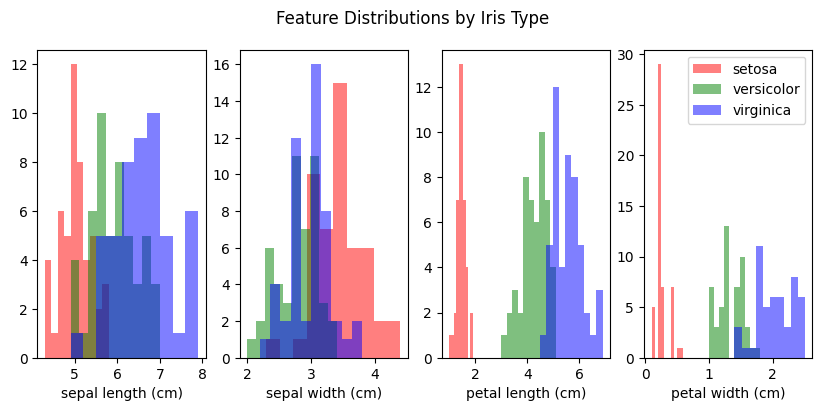

In [7]:
plot_iris_feat_distribution()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
                train_test_split(df.loc[:, df.columns != 'target'],
                df['target'], random_state=42)

print(X_train.shape, y_train.shape)

(112, 4) (112,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

# Transform X_train and X_test. 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Now the values should be scaled
X_train = pd.DataFrame(X_train, columns=iris.feature_names)
X_train.describe().round(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000,112.000,112.000,112.000
mean,0.000,-0.000,-0.000,0.000
std,1.004,1.004,1.004,1.004
min,-1.877,-2.390,-1.567,-1.496
25%,-0.896,-0.552,-1.278,-1.228
50%,-0.037,-0.092,0.285,0.115
75%,0.699,0.597,0.748,0.787
max,2.293,2.665,1.675,1.727


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

logReg = LogisticRegression(random_state=42).fit(X_train, y_train)
print(logReg.score(X_test,y_test).round(5))

0.97368


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test) 

In [12]:
print(X_train_pca.shape)

(112, 2)


In [14]:
print((pca.explained_variance_ratio_*100).sum().round(2))
(pca.explained_variance_ratio_*100).round(2)

95.3


array([71.58, 23.72])

In [15]:
logRegPCA = LogisticRegression(random_state=42).fit(X_train_pca, y_train)
print(logRegPCA.score(X_test_pca,y_test).round(5))

0.94737


In [16]:
def plot_dec_bounds_pca():
    
    # Function adopted from 
    # with license: Learn.co and Flatiron School LLC Educational Content License

    # Combine all data into one df
    X_all_pca = pd.concat([pd.DataFrame(X_train_pca), pd.DataFrame(X_test_pca)], axis=0)
    X_all_pca.columns = ["PC 1", "PC 2"]
    X_all_pca["target"] = pd.concat([y_train, y_test], axis=0).values

    # Set up figure and axes
    fig, ax = plt.subplots(figsize=(5, 5))
    # ax.grid()

    # Scatter plot of all data points
    colors = ["r", "g", "b"] # Setting up colors again in case they were edited earlier
    markers = ["^", "s", "o"]
    for target_index in [0, 1, 2]:
        subset_rows = X_all_pca[X_all_pca["target"] == target_index]

        ax.scatter(subset_rows["PC 1"], subset_rows["PC 2"], c=colors[target_index],
                   marker= markers[target_index])

    # Get bounds and set step size for mesh grid
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    h = 0.01

    # Build mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logRegPCA.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot filled contour
    ax.contourf(xx, yy, Z, alpha=0.25, cmap='Blues')

    # Customize labels
    ax.set_xlabel('First Principal Component ', fontsize = 15)
    ax.set_ylabel('Second Principal Component ', fontsize = 15)
    # ax.set_title('PCA-Transformed Iris Dataset with Decision Boundaries', fontsize = 20)
    ax.legend(iris.target_names.tolist(), fontsize=15, bbox_to_anchor=(1.5, 1.03));

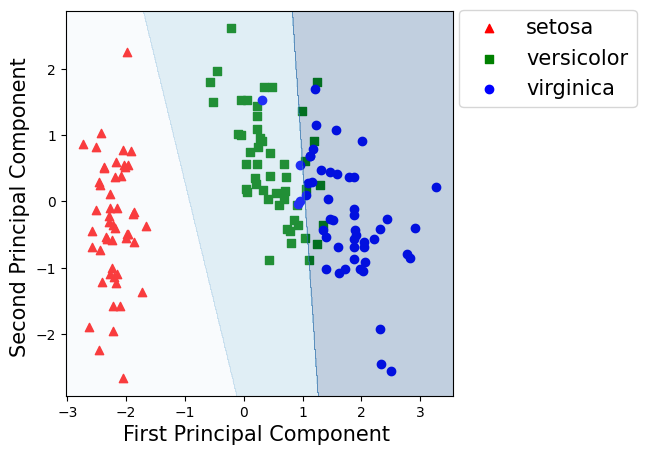

In [17]:
plot_dec_bounds_pca()

In [18]:
def plot_dec_bounds_lda():
    # Combine all data into one df
    X_all_lda = pd.concat([pd.DataFrame(X_train_lda), pd.DataFrame(X_test_lda)], axis=0)
    X_all_lda.columns = ["PC 1", "PC 2"]
    X_all_lda["target"] = pd.concat([y_train, y_test], axis=0).values

    # Set up figure and axes
    fig, ax = plt.subplots(figsize=(5, 5))
    # ax.grid()

    # Scatter plot of all data points
    colors = ["r", "g", "b"] # Setting up colors again in case they were edited earlier
    markers = ["^", "s", "o"]
    for target_index in [0, 1, 2]:
        subset_rows = X_all_lda[X_all_lda["target"] == target_index]

        ax.scatter(subset_rows["PC 1"], subset_rows["PC 2"], c=colors[target_index],
                   marker= markers[target_index])

    # Get bounds and set step size for mesh grid
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    h = 0.01

    # Build mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logRegLDA.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot filled contour
    ax.contourf(xx, yy, Z, alpha=0.25, cmap='Blues')

    # Customize labels
    ax.set_xlabel('First  Component ', fontsize = 15)
    ax.set_ylabel('Second Component ', fontsize = 15)
    # ax.set_title('PCA-Transformed Iris Dataset with Decision Boundaries', fontsize = 20)
    ax.legend(iris.target_names.tolist(), fontsize=15, bbox_to_anchor=(1.5, 1.03));

## What more can we do ? 


* What type of learning was PCA?

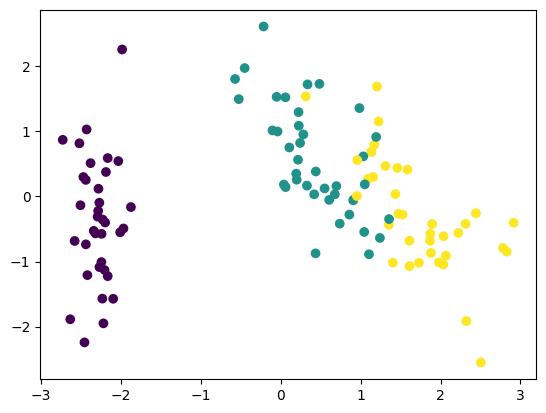

In [13]:
plt.scatter(*X_train_pca.transpose(), c=y_train)

## What more can we do ? 

* Use our labeled data to find __better__ projections
* Remember: our main goal is to reduce the dimensions our data
* Linear Discriminant Analysis (LDA)
* Project to lower dimension __and__:
    * Maximize the distance between class means

<img     src="./image/lda-bad.png" width=500px style="margin-left:auto; margin-right:auto">

<figcaption><h1 style="font-size:30%;text-align: center;"> Bishop (2006) </h1> </figcaption>

<img     src="./image/lda-good.png" width=550px style="margin-left:auto; margin-right:auto">

<figcaption><h1 style="font-size:30%;text-align: center;"> Bishop (2006) </h1> </figcaption>

##  Linear Discriminant Analysis (LDA)
* Project to lower dimension __and__:
    * Maximize the distance between class means
    * Minimize the variance for in-class samples
   

* $ \mathbf{z} = \mathbf{w}^T \mathbf{x}$
* Fischer Criterion $J(\mathbf{w})= \frac{\left(m_2-m_1\right)^2}{s_1^2+s_2^2}= \frac{\mathbf{w}^{\mathrm{T}} \mathbf{S}_{\mathrm{B}} \mathbf{w}}{\mathbf{w}^{\mathrm{T}} \mathbf{S}_{\mathrm{W}} \mathbf{w}}$
* $\mathbf{S}_{\mathrm{B}}=\left(\mathbf{m}_2-\mathbf{m}_1\right)\left(\mathbf{m}_2-\mathbf{m}_1\right)^{\mathrm{T}}$
* $\mathbf{S}_{\mathrm{W}}=\sum_{n \in \mathcal{C}_1}\left(\mathbf{x}_n-\mathbf{m}_1\right)\left(\mathbf{x}_n-\mathbf{m}_1\right)^{\mathrm{T}}+\sum_{n \in \mathcal{C}_2}\left(\mathbf{x}_n-\mathbf{m}_2\right)\left(\mathbf{x}_n-\mathbf{m}_2\right)^{\mathrm{T}}$
* $\mathbf{w} \propto \mathbf{S}_{\mathrm{W}}^{-1}\left(\mathbf{m}_2-\mathbf{m}_1\right)$

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2).fit(X_train,y_train)
X_train_lda = lda.transform(X_train) 
X_test_lda = lda.transform(X_test) 

print(lda.explained_variance_ratio_*100)

[99.08071323  0.91928677]


In [20]:
logRegLDA = LogisticRegression(random_state=42).fit(X_train_lda, y_train)
print(logRegLDA.score(X_test_lda,y_test).round(5))

0.97368


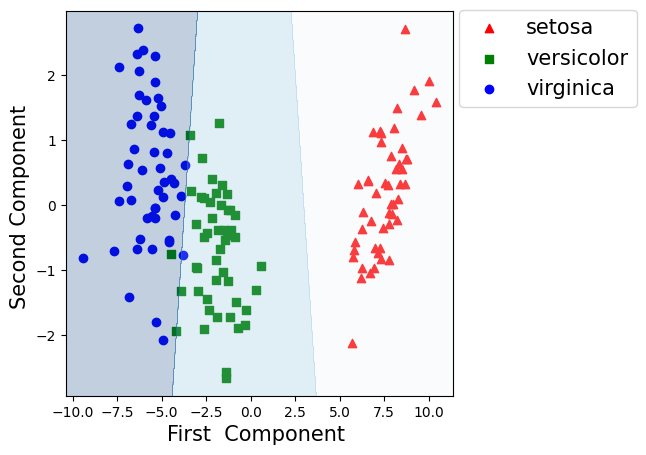

In [21]:
plot_dec_bounds_lda()

## T-SNE

* Stochastic method
* Optimized for projection into $2D$ and $3D$

## Idea
* Define similarity between points as a probability 
$p_{j \mid i}=\frac{\exp \left(-\left\|\mathbf{x}_i-\mathbf{x}_j\right\|^2 / 2 \sigma_i^2\right)}{\sum_{k \neq i} \exp \left(-\left\|\mathbf{x}_i-\mathbf{x}_k\right\|^2 / 2 \sigma_i^2\right)}
\\\\
$



* $p_{i j}=\frac{p_{j \mid i}+p_{i \mid j}}{2 N}$
* Now try to mimic this distribution in low dimensions:

* $q_{i j}=\frac{\left(1+\left\|\mathbf{y}_i-\mathbf{y}_j\right\|^2\right)^{-1}}{\sum_k \sum_{l \neq k}\left(1+\left\|\mathbf{y}_k-\mathbf{y}_l\right\|^2\right)^{-1}}
$

* Why a different probability distribution ? t-student has wide tails!

* Minimize K-L divergence between the two probability densities using stochastic optimization methods (moves points in lower dimension)

* $ \mathrm{KL}(P \| Q)=\sum_{i \neq j} p_{i j} \log \frac{p_{i j}}{q_{i j}}$


## T-SNE

* t-distributed stochastic neighbor embedding

In [22]:
digits = load_digits()
x = digits.data
y = digits.target

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.326649
[t-SNE] KL divergence after 1000 iterations: 0.754770


<Figure size 600x100 with 0 Axes>

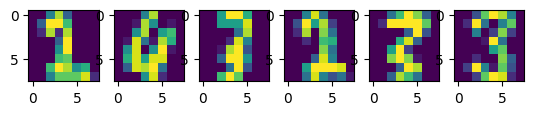

In [23]:
sample = np.random.randint(0 ,high=x.shape[0], size= 6)
plt.figure(figsize=(6,1))
f, ax = plt.subplots(1,6)
for i,a in enumerate(ax) : 
    a.imshow(np.reshape(x[sample[i],:],(8,8))) 

In [25]:
df = pd.DataFrame()
df["y"] = y
df["component-1"] = z[:,0]
df["component-2"] = z[:,1]

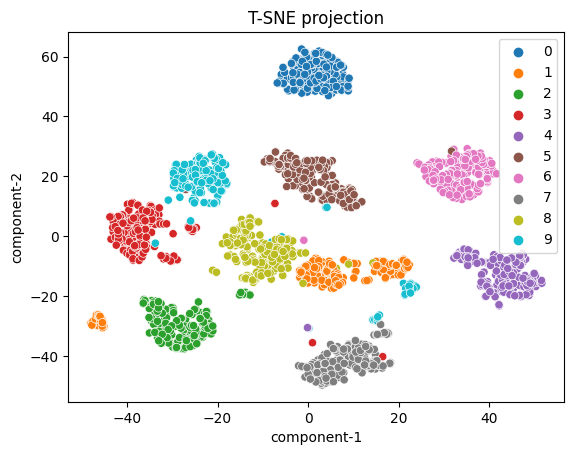

In [26]:
sns.scatterplot(x="component-1", y="component-2", hue=df.y.tolist(),
                palette=sns.color_palette("tab10", 10),
                data=df).set(title="T-SNE projection");

|  <img     src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png" width=500px style="margin-left:auto; margin-right:auto">   |   <img     src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_006.png" width=360px style="margin-left:auto; margin-right:auto">  |
| --- | --- |

<figcaption><h1 style="font-size:30%;text-align: center;"> https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py </h1> </figcaption>


# Conclusions

## What did we discuss?

* PCA, LDA, t-SNE
* Issues of computation at scale
* Applications of dimensionality reduction




## Other interesting things to look for

* Incremental versions of PCA and LDA
* Non-linear versions (Kernel trick)

### References

<div class="alert alert-success" role="alert">
  Murphy, Kevin P. Probabilistic Machine Learning: An Introduction (Adaptive Computation and Machine Learning series). MIT Press, 2022 .
</div>

<div class="alert alert-info" role="alert">
  Bishop, Christopher M. Pattern Recognition and Machine Learning. Springer, 2006.
</div>


## PCA for high-dimensional data

* If number of samples $N<< H$
* Example: a few hundred images each with millions of pixels
* The subspace defined by all linear combinations of $x_n$ has dimension $N-1$
 *  Collect the zero-mean the data in $X[n,:] = x_n - \bar x $
 * $X \in \mathbb{R}^{N \times H}$
 * $\mathbf{S} = \frac{1}{N} X^T X$ 
 * $ \mathbf{S} \mathbf{u}_1 = \lambda \mathbf{u}_1$

## PCA for high-dimensional data

* If number of samples $N<< H$
* Example: a few hundred images each with millions of pixels
* The subspace defined by all linear combinations of $x_n$ has dimension $N-1$

* $ \mathbf{S} \mathbf{u}_1= \frac{1}{N} X^T X \mathbf{u}_1  = \lambda \mathbf{u}_1$
* $  \frac{1}{N} X X^T X \mathbf{u}_1  = \lambda X \mathbf{u}_1$
* $  \frac{1}{N} X X^T (X \mathbf{u}_1)  = \lambda( X \mathbf{u}_1)$
* $ \frac{1}{N} X X^T \mathbf{v}_1 = \lambda \mathbf{v}_1 $


* What is the dimension of $XX^T$ ? 
* How to compute $\mathbf{u}_1$ ?